In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "mouse_drug_data.csv"
clinical_data = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_data)
clinical_df = pd.read_csv(clinical_data)

# Combine the data into a single dataset
full_df = pd.merge(mouse_df, clinical_df, on="Mouse ID", how="left")

# Display the data table for preview
full_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_series = full_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_series)
tumor_mean_df.reset_index(inplace=True)

# Preview DataFrame
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_error = full_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_error)
tumor_sem_df.reset_index(inplace=True)

# Preview DataFrame
tumor_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_pivot = tumor_mean_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
sem_pivot = tumor_sem_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


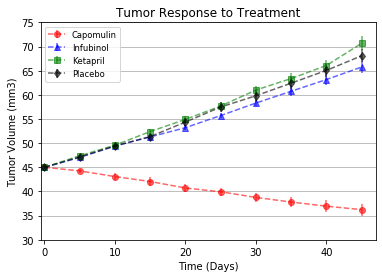

In [6]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(mean_pivot.index, mean_pivot.Capomulin, yerr=tumor_error.Capomulin,
          fmt="o", color="r", ls="--", alpha=0.6, label="Capomulin")

ax.errorbar(mean_pivot.index, mean_pivot.Infubinol, yerr=tumor_error.Infubinol,
          fmt="^", color="b", ls="--", alpha=0.6, label="Infubinol")

ax.errorbar(mean_pivot.index, mean_pivot.Ketapril, yerr=tumor_error.Ketapril,
          fmt="s", color="g", ls="--", alpha=0.6, label="Ketapril")

ax.errorbar(mean_pivot.index, mean_pivot.Placebo, yerr=tumor_error.Placebo,
          fmt="d", color="k", ls="--", alpha=0.6, label="Placebo")

ax.set_xlim(-0.5,47)

ax.set_ylim(30, 75)

ax.set_xlabel("Time (Days)")

ax.set_ylabel("Tumor Volume (mm3)")

plt.grid(axis='y')

plt.title("Tumor Response to Treatment")

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Tumor Response.png")

In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = full_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
meta_mean_df = pd.DataFrame(meta_mean)
meta_mean_df.reset_index(inplace=True)

# Preview DataFrame
meta_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_error = full_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
meta_error_df = pd.DataFrame(meta_error)
meta_error_df.reset_index(inplace=True)

# Preview DataFrame
meta_error_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean_pivot = meta_mean_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
meta_mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
meta_error_pivot = meta_error_df.pivot_table(index='Timepoint',
                                             columns='Drug',values='Metastatic Sites')
meta_error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


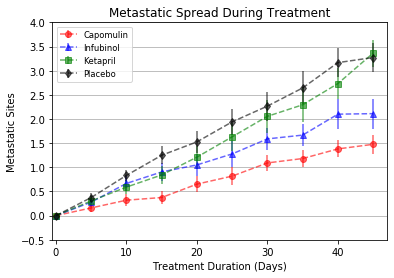

In [12]:
fig, ax = plt.subplots()

ax.errorbar(meta_mean_pivot.index, meta_mean_pivot.Capomulin, yerr=meta_error.Capomulin,
          fmt="o", color="r", ls="--", alpha=0.6, label="Capomulin")

ax.errorbar(meta_mean_pivot.index, meta_mean_pivot.Infubinol, yerr=meta_error.Infubinol,
          fmt="^", color="b", ls="--", alpha=0.6, label="Infubinol")

ax.errorbar(meta_mean_pivot.index, meta_mean_pivot.Ketapril, yerr=meta_error.Ketapril,
          fmt="s", color="g", ls="--", alpha=0.6, label="Ketapril")

ax.errorbar(meta_mean_pivot.index, meta_mean_pivot.Placebo, yerr=meta_error.Placebo,
          fmt="d", color="k", ls="--", alpha=0.6, label="Placebo")

ax.set_xlim(-0.5,47)

ax.set_ylim(-0.5, 4)

ax.set_xlabel("Treatment Duration (Days)")

ax.set_ylabel("Metastatic Sites")

plt.grid(axis='y')

plt.title("Metastatic Spread During Treatment")

plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Metastatic Response.png")

In [13]:
# Show the Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mouse = full_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
count_mouse_df = pd.DataFrame(count_mouse)
count_mouse_df.reset_index(inplace=True)

# Preview DataFrame
count_mouse_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [60]:
# Minor Data Munging to Re-Format the Data Frames
count_mouse_pivot = count_mouse_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview the Data Frame
count_mouse_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


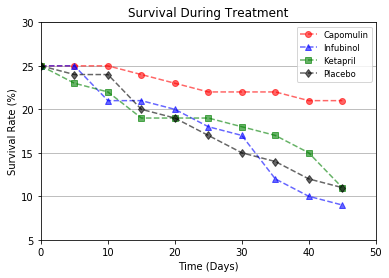

In [61]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()

ax.errorbar(count_mouse_pivot.index.values, count_mouse_pivot.Capomulin, 
            fmt="o", color="r", ls="--", alpha=0.6, label="Capomulin")
ax.errorbar(count_mouse_pivot.index.values, count_mouse_pivot.Infubinol, 
            fmt="^", color="b", ls="--", alpha=0.6, label="Infubinol")
ax.errorbar(count_mouse_pivot.index.values, count_mouse_pivot.Ketapril, 
            fmt="s", color="g", ls="--", alpha=0.6, label="Ketapril")
ax.errorbar(count_mouse_pivot.index.values, count_mouse_pivot.Placebo, 
            fmt="d", color="k", ls="--", alpha=0.6, label="Placebo")

ax.set_xlim(0, 50)
ax.set_ylim(5, 30)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
plt.grid(axis='y')

plt.title("Survival During Treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Survival Rates.png")

In [17]:
# Show the Figure
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
per_change = (mean_pivot.iloc[9,:] - mean_pivot.iloc[0,:])/mean_pivot.iloc[0,:]

# Display the data to confirm
per_change

Drug
Capomulin   -0.194753
Ceftamin     0.425165
Infubinol    0.461235
Ketapril     0.570288
Naftisol     0.539233
Placebo      0.512980
Propriva     0.472412
Ramicane    -0.223209
Stelasyn     0.520851
Zoniferol    0.465798
dtype: float64

In [19]:
# Store all Relevant Percent Changes into a Tuple
per_tup = tuple(per_change)
per_tup

(-0.19475302667894173,
 0.4251649185589744,
 0.4612347172785187,
 0.5702879468660608,
 0.5392334713476923,
 0.5129796048315153,
 0.4724117486320637,
 -0.22320900462766674,
 0.5208513428789903,
 0.4657975086509525)

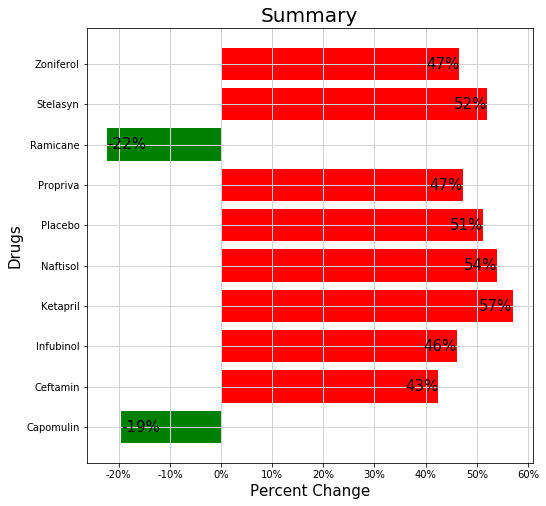

In [59]:
# Splice the data between passing and failing drugs
fig, ax = plt.subplots(figsize=(8,8))

ax.barh(mean_pivot.columns, per_tup,
        color=['red' if per_tup[value] > 0 else 'green' for value in np.arange(len(mean_pivot.columns))])

# Orient widths. Add labels, tick marks, etc. 
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

plt.xlabel("Percent Change", size=15)
plt.ylabel("Drugs", size=15)

plt.title("Summary", size=20)

plt.grid(b=None, which='major', axis='both', color='#d3d3d3', linestyle='-', linewidth=1)

# Use functions to label the percentages of changes
def percent(ax, spacing=0):
    rect = ax.patches
    for rect in ax.patches:
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        space = spacing
        ha = "right"
        if x_value < 0:
            ha = "left"
            space *= -1
        label = "{:.0%}".format(x_value)
        ax.annotate(label, (x_value, y_value), xytext=(space, 0),
                    textcoords="offset points", ha=ha, va="center", size=15)

# Call functions to implement the function calls
percent(ax)

# Save the Figure
plt.savefig("Summary.png")

In [ ]:
# Show the Figure
fig.show()

Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

Observations:
1. Cumulative results suggest Ramicane and Capomulin decrease tumor volume size over time. All other drug and placebo treatments did not result in decreased tumor volume size over time. 
2. All other drug treatments that did not result in decreased tumor volume size over time were ineffective at a similar rate to placebo treatment, suggesting these drugs also do not slow the rate of tumor growth. Additional research is needed to determine if this hypothesis of complete inefficacy is true. 
3. One additional mouse survived on Capomulin treatment over Ramicane treatment. Further research is needed to determine if this suggests a statistically significant rate of survival on Capomulin treatment over Ramicane treatment. 
